In [57]:
from minirl.nets2.layers import FullyConnected
from minirl.nets2.activations import ReLU,Sigmoid
from minirl.nets2.optimizers import Adam
from minirl.nets2.utils.testing import random_tensor
test=FullyConnected(3,3,Sigmoid(),optimizer=Adam())

In [3]:
import numpy as np
n_ex = np.random.randint(1, 3)
n_in = np.random.randint(1, 3)
n_out = np.random.randint(1, 3)

X = random_tensor((n_ex, n_in), standardize=True)
X

array([[0., 0.]])

In [17]:
X=np.array([2,3,3])

In [58]:
test.forward(X)

array([[0.1892266 , 0.48250999, 0.81890806]])

In [33]:
X=np.array([[2,3,1]])
y_pred = test.forward(X)
y_pred

array([[0.80143284, 0.54159086, 0.95437358]])

In [31]:
# backprop
dLdy = np.ones_like(y_pred)
dLdX = test.backward(dLdy)
dLdy,dLdX

(array([[1., 1., 1.]]), array([[ 0.20085931, -0.09707811,  0.28535636]]))

In [10]:
np.array([[2,3,1],[1,3,4],[9,13,32]]).shape

(3, 3)

In [32]:
test.parameters

{'W': array([[-0.12827015,  0.78384671,  0.61238798],
        [ 0.40777717, -0.79954623,  0.83896523],
        [ 0.4284826 ,  0.99769401, -0.70110339]]),
 'b': array([[0., 0., 0.]])}

In [56]:
test.hyperparameters

{'layer': 'FullyConnected',
 'init': 'glorot_uniform',
 'n_in': 3,
 'n_out': 3,
 'act_fn': 'Sigmoid',
 'optimizer': {'cache': {},
  'hyperparameters': {'id': 'Adam',
   'lr': 0.001,
   'eps': 1e-07,
   'decay1': 0.9,
   'decay2': 0.999,
   'clip_norm': None,
   'lr_scheduler': 'ConstantScheduler(lr=0.001)'}}}

Iteration 0: w=0.117050, b=0.200598, loss=4.3641
Iteration 100: w=1.409859, b=1.321187, loss=0.0376
Iteration 200: w=1.684291, b=1.174112, loss=0.0172
Iteration 300: w=1.824333, b=1.099058, loss=0.0119
Iteration 400: w=1.895797, b=1.060758, loss=0.0106
Iteration 500: w=1.932265, b=1.041214, loss=0.0102
Iteration 600: w=1.950875, b=1.031240, loss=0.0101
Iteration 700: w=1.960371, b=1.026151, loss=0.0101
Iteration 800: w=1.965217, b=1.023554, loss=0.0101
Iteration 900: w=1.967690, b=1.022228, loss=0.0101


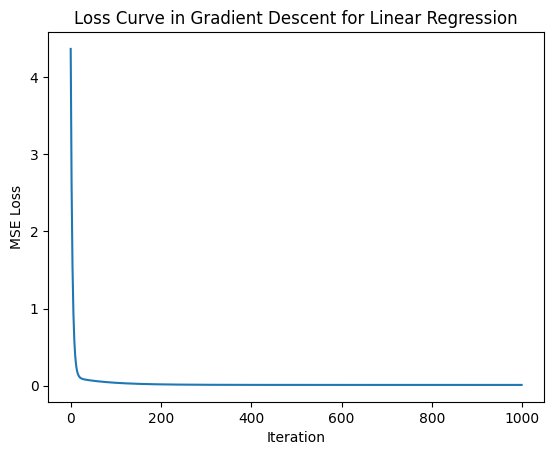

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数：线性模型 y = w * x + b
def linear_model(x, w, b):
    return w * x + b

# 定义损失函数：均方误差（MSE）
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 生成随机数据集
np.random.seed(0)
x = np.linspace(0, 1, 100)
y = 2 * x + 1 + np.random.normal(loc=0, scale=0.1, size=(100,))

# 初始化参数 w 和 b
w = 0
b = 0
lr = 0.1  # 学习率
max_iter = 1000  # 最大迭代次数

# 使用梯度下降法求解最优参数（w、b）
losses = []
for i in range(max_iter):
    y_pred = linear_model(x, w, b)
    loss = mse_loss(y, y_pred)
    losses.append(loss)
    dw = -np.mean((y - y_pred) * x)
    db = -np.mean(y - y_pred)
    w -= lr * dw
    b -= lr * db
    if i % 100 == 0:
        print("Iteration %d: w=%f, b=%f, loss=%.4f" % (i, w, b, loss))

# 绘制损失函数下降的曲线
fig, ax = plt.subplots()
ax.plot(losses)
ax.set_xlabel('Iteration')
ax.set_ylabel('MSE Loss')
ax.set_title('Loss Curve in Gradient Descent for Linear Regression')
plt.show()


In [26]:
# 定义函数 f(x) = x^2 及其导数 df(x) = 2x
def f(x):
    return x ** 2

def df(x):
    return 2 * x

# 初始点 x0 和学习率 lr，以及迭代次数 max_iter
x0 = 15  # 初始点（可根据实际情况调整）
lr = 0.4  # 学习率（可根据实际情况调整）
max_iter = 100  # 迭代次数（可根据实际情况调整）

# 使用梯度下降法求解最小值
for i in range(max_iter):
    x0 = x0 - lr * df(x0)
    print("第 %d 次迭代：x=%f, f(x)=%f" % (i+1, x0, f(x0)))


第 1 次迭代：x=3.000000, f(x)=9.000000
第 2 次迭代：x=0.600000, f(x)=0.360000
第 3 次迭代：x=0.120000, f(x)=0.014400
第 4 次迭代：x=0.024000, f(x)=0.000576
第 5 次迭代：x=0.004800, f(x)=0.000023
第 6 次迭代：x=0.000960, f(x)=0.000001
第 7 次迭代：x=0.000192, f(x)=0.000000
第 8 次迭代：x=0.000038, f(x)=0.000000
第 9 次迭代：x=0.000008, f(x)=0.000000
第 10 次迭代：x=0.000002, f(x)=0.000000
第 11 次迭代：x=0.000000, f(x)=0.000000
第 12 次迭代：x=0.000000, f(x)=0.000000
第 13 次迭代：x=0.000000, f(x)=0.000000
第 14 次迭代：x=0.000000, f(x)=0.000000
第 15 次迭代：x=0.000000, f(x)=0.000000
第 16 次迭代：x=0.000000, f(x)=0.000000
第 17 次迭代：x=0.000000, f(x)=0.000000
第 18 次迭代：x=0.000000, f(x)=0.000000
第 19 次迭代：x=0.000000, f(x)=0.000000
第 20 次迭代：x=0.000000, f(x)=0.000000
第 21 次迭代：x=0.000000, f(x)=0.000000
第 22 次迭代：x=0.000000, f(x)=0.000000
第 23 次迭代：x=0.000000, f(x)=0.000000
第 24 次迭代：x=0.000000, f(x)=0.000000
第 25 次迭代：x=0.000000, f(x)=0.000000
第 26 次迭代：x=0.000000, f(x)=0.000000
第 27 次迭代：x=0.000000, f(x)=0.000000
第 28 次迭代：x=0.000000, f(x)=0.000000
第 29 次迭代：x=0.000000, f(x)=0.0

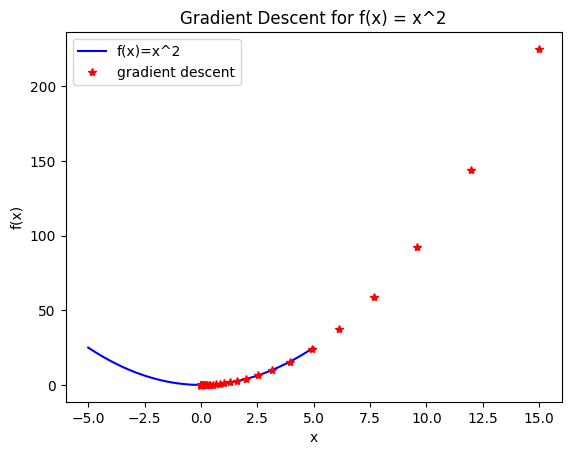

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数 f(x) = x^2 及其导数 df(x) = 2x
def f(x):
    return x ** 2

def df(x):
    return 2 * x

# 初始点 x0 和学习率 lr，以及迭代次数 max_iter
x0 = 15  # 初始点（可根据实际情况调整）
lr = 0.1  # 学习率（可根据实际情况调整）
max_iter = 100  # 迭代次数（可根据实际情况调整）

# 使用梯度下降法求解最小值
x = [x0]
y = [f(x0)]
for i in range(1, max_iter+1):
    x_i = x[i-1] - lr * df(x[i-1])
    x.append(x_i)
    y.append(f(x_i))

# 绘制函数图像和梯度下降过程
fig, ax = plt.subplots()
x_vals = np.linspace(-5, 5, 100)
y_vals = f(x_vals)
ax.plot(x_vals, y_vals, 'b-', label='f(x)=x^2')
ax.plot(x, y, 'r*', label='gradient descent')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Gradient Descent for f(x) = x^2')
ax.legend()
plt.show()


In [36]:
import numpy as np

class NeuralNet:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(hidden_size, input_size)
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size)
        self.b2 = np.zeros((output_size, 1))

    def forward(self, x):
        # input -> hidden layer
        # z1 = np.dot(self.W1, x) + self.b1
        z1 = np.dot(self.W1, x.reshape(-1, 1)) + self.b1

        a1 = np.maximum(z1, 0)   # ReLU activation
        # hidden layer -> output
        score = np.dot(self.W2, a1) + self.b2
        return score, a1

class LinUCB:
    def __init__(self, n_arms, n_features, alpha):
        self.n_arms = n_arms
        self.n_features = n_features
        self.alpha = alpha
        self.A = [
            np.identity(n_features) for _ in range(n_arms)
        ]
        self.b = [np.zeros((n_features, 1)) for _ in range(n_arms)]

    def predict(self, features):
        p = np.zeros((self.n_arms,))
        for i in range(self.n_arms):
            a_inv = np.linalg.inv(self.A[i])
            theta = a_inv @ self.b[i]
            ucb = self.alpha * np.sqrt(features.T @ a_inv @ features)
            p[i] = theta.T @ features + ucb
        return p

# Example usage
n_users = 100
n_items = 200
input_size = n_users + n_items
hidden_size = 32
output_size = 1
model = NeuralNet(input_size, hidden_size, output_size)
linucb = LinUCB(n_items, hidden_size, 0.1)

user_id = 0
item_ids = np.arange(n_items)
inputs = np.zeros((input_size, n_items))
inputs[user_id, :] = 1   # one-hot encode user ID
inputs[n_users + item_ids, item_ids] = 1   # one-hot encode item IDs
scores, _ = model.forward(inputs)
features = scores.T   # transpose to get shape (n_items, n_features)
recommendations = linucb.predict(features)

# recommend the item with highest score
recommended_item = np.argmax(recommendations)
print(recommended_item)


ValueError: shapes (32,300) and (60000,1) not aligned: 300 (dim 1) != 60000 (dim 0)

In [48]:
import numpy as np
import gym


class LinUCB:
    def __init__(self, n_features, n_actions, alpha=0.1):
        self.n_features = n_features
        self.n_actions = n_actions
        self.alpha = alpha
        self.A = [np.eye(n_features) for _ in range(n_actions)]
        self.b = [np.zeros((n_features, 1)) for _ in range(n_actions)]
        self.models = [self.create_model() for _ in range(n_actions)]

    def create_model(self):
        model = {}
        model["W1"] = np.random.randn(64, self.n_features) * np.sqrt(2 / self.n_features)
        model["b1"] = np.zeros((64, 1))
        model["W2"] = np.random.randn(32, 64) * np.sqrt(2 / 64)
        model["b2"] = np.zeros((32, 1))
        model["W3"] = np.random.randn(1, 32) * np.sqrt(2 / 32)
        model["b3"] = np.zeros((1, 1))
        return model

    def forward(self, x,a):
        x = x.reshape((self.n_features, 1))
        h1 = np.maximum(0, np.dot(self.models[a]["W1"], x) + self.models[a]["b1"])
        h2 = np.maximum(0, np.dot(self.models[a]["W2"], h1) + self.models[a]["b2"])
        y = np.dot(self.models[a]["W3"], h2) + self.models[a]["b3"]
        return y

    def predict(self, x):
        # x = np.array(x).reshape((self.n_features, 1))
        x = x.reshape((self.n_features, 1))

        p = [self.forward(x,a) + self.alpha * np.sqrt(np.dot(np.dot(x.T, np.linalg.inv(self.A[a])), x)) for a in range(self.n_actions)]
        return np.argmax(p)

    def update(self, x, a, r, lr=0.001):
        x = x.reshape((self.n_features, 1))
        h1 = np.maximum(0, np.dot(self.models[a]["W1"], x) + self.models[a]["b1"])
        h2 = np.maximum(0, np.dot(self.models[a]["W2"], h1) + self.models[a]["b2"])
        y_pred = np.dot(self.models[a]["W3"], h2) + self.models[a]["b3"]
        loss = (r - y_pred)**2
        dy_pred = -2 * (r - y_pred)
        dW3 = np.dot(dy_pred, h2.T)
        db3 = dy_pred
        dW2 = np.dot(self.models[a]["W3"].T, dy_pred) * (h2 > 0)
        db2 = np.dot(self.models[a]["W3"].T, dy_pred) * (h2 > 0)
        dW1 = np.dot(self.models[a]["W2"].T, dW2) * (h1 > 0)
        db1 = np.dot(self.models[a]["W2"].T, dW2) * (h1 > 0)
        dW1 = np.dot(dW1, x.T)
        db1 = np.dot(db1, np.ones((1, 1)))
        self.models[a]["W1"] -= lr * dW1
        self.models[a]["b1"] -= lr * db1
        self.models[a]["W2"] -= lr * dW2
        self.models[a]["b2"] -= lr * db2
        self.models[a]["W3"] -= lr * dW3
        self.models[a]["b3"] -= lr * db3
        self.A[a] += np.dot(x, x.T)
        self.b[a] += r * x
        

# Example environment: CartPole-v1 from OpenAI Gym
env = gym.make('CartPole-v1')
n_features = env.observation_space.shape[0]
n_actions = env.action_space.n

# Initialize LinUCB algorithm
linucb = LinUCB(n_features, n_actions)

# Training loop
avg_reward = []
num_episodes = 10000
for i in range(num_episodes):
    state,_ = env.reset()
    total_reward = 0
    ep_reward = 0

    # Episode loop
    done = False
    while not done:
        # Choose action using LinUCB policy
        action = linucb.predict(state)

        # Execute action and receive next state and reward from environment
        next_state, reward, done, _,_ = env.step(action)
        total_reward += reward
        ep_reward += reward

        # Update LinUCB model
        linucb.update(state, action, reward)

        # Update state for next iteration
        state = next_state

    # Print results
    if (i+1) % 100 == 0:
        print("Ave reward: {}".format(sum(avg_reward) / len(avg_reward)))
        avg_reward = []
    else:
        avg_reward.append(ep_reward)
    #print("Episode %d, Total Reward: %d" % (i+1, total_reward))


Ave reward: 11.525252525252526
Ave reward: 9.282828282828282
Ave reward: 9.232323232323232
Ave reward: 9.252525252525253
Ave reward: 9.404040404040405
Ave reward: 9.323232323232324
Ave reward: 9.545454545454545
Ave reward: 9.464646464646465
Ave reward: 9.363636363636363
Ave reward: 9.333333333333334
Ave reward: 9.444444444444445
Ave reward: 9.282828282828282
Ave reward: 9.222222222222221
Ave reward: 9.313131313131313
Ave reward: 9.444444444444445
Ave reward: 9.373737373737374
Ave reward: 9.323232323232324
Ave reward: 9.292929292929292
Ave reward: 9.313131313131313
Ave reward: 9.222222222222221
Ave reward: 9.414141414141413
Ave reward: 9.181818181818182
Ave reward: 9.333333333333334
Ave reward: 9.232323232323232
Ave reward: 9.343434343434344
Ave reward: 9.282828282828282
Ave reward: 9.323232323232324
Ave reward: 9.474747474747474
Ave reward: 9.393939393939394
Ave reward: 9.363636363636363
Ave reward: 9.292929292929292
Ave reward: 9.383838383838384
Ave reward: 9.404040404040405
Ave rewar

In [49]:
import numpy as np
import gym


class LinUCB:
    def __init__(self, n_features, n_actions, alpha=0.1):
        self.n_features = n_features
        self.n_actions = n_actions
        self.alpha = alpha
        self.A = [np.eye(n_features) for _ in range(n_actions)]
        self.b = [np.zeros((n_features, 1)) for _ in range(n_actions)]
        self.models = [self.create_model() for _ in range(n_actions)]

    def create_model(self):
        model = {}
        model["W1"] = np.random.randn(64, self.n_features) * np.sqrt(2 / self.n_features)
        model["b1"] = np.zeros((64, 1))
        model["W2"] = np.random.randn(1, 64) * np.sqrt(2 / 64)
        model["b2"] = np.zeros((1, 1))
        return model

    def forward(self, x, a):
        x = x.reshape((self.n_features, 1))
        h1 = np.maximum(0, np.dot(self.models[a]["W1"], x) + self.models[a]["b1"])
        y = np.dot(self.models[a]["W2"], h1) + self.models[a]["b2"]
        return y

    def predict(self, x):
        x = x.reshape((self.n_features, 1))
        p = [self.forward(x, a) + self.alpha * np.sqrt(np.dot(np.dot(x.T, np.linalg.inv(self.A[a])), x)) for a in range(self.n_actions)]
        return np.argmax(p)

    def update(self, x, a, r, lr=0.001):
        x = x.reshape((self.n_features, 1))
        h1 = np.maximum(0, np.dot(self.models[a]["W1"], x) + self.models[a]["b1"])
        y_pred = np.dot(self.models[a]["W2"], h1) + self.models[a]["b2"]
        loss = (r - y_pred)**2
        dy_pred = -2 * (r - y_pred)
        dW2 = np.dot(dy_pred, h1.T)
        db2 = dy_pred
        dh1 = np.dot(self.models[a]["W2"].T, dy_pred) * (h1 > 0)
        dW1 = np.dot(dh1, x.T)
        db1 = np.dot(dh1, np.ones((1, 1)))
        self.models[a]["W1"] -= lr * dW1
        self.models[a]["b1"] -= lr * db1
        self.models[a]["W2"] -= lr * dW2
        self.models[a]["b2"] -= lr * db2
        self.A[a] += np.dot(x, x.T)
        self.b[a] += r * x
        

# Example environment: CartPole-v1 from OpenAI Gym
env = gym.make('CartPole-v1')
n_features = env.observation_space.shape[0]
n_actions = env.action_space.n

# Initialize LinUCB algorithm
linucb = LinUCB(n_features, n_actions)

# Training loop
num_episodes = 1000
for i in range(num_episodes):
    state ,_= env.reset()
    total_reward = 0

    # Episode loop
    done = False
    while not done:
        # Choose action using LinUCB policy
        action = linucb.predict(state)

        # Execute action and receive next state and reward from environment
        next_state, reward, done, _,_ = env.step(action)
        total_reward += reward

        # Update LinUCB model
        linucb.update(state, action, reward)

        # Update state for next iteration
        state = next_state

    # Print results
    print("Episode %d, Total Reward: %d" % (i+1, total_reward))


Episode 1, Total Reward: 9
Episode 2, Total Reward: 10
Episode 3, Total Reward: 10
Episode 4, Total Reward: 10
Episode 5, Total Reward: 10
Episode 6, Total Reward: 9
Episode 7, Total Reward: 9
Episode 8, Total Reward: 9
Episode 9, Total Reward: 9
Episode 10, Total Reward: 10
Episode 11, Total Reward: 8
Episode 12, Total Reward: 10
Episode 13, Total Reward: 9
Episode 14, Total Reward: 9
Episode 15, Total Reward: 8
Episode 16, Total Reward: 10
Episode 17, Total Reward: 9
Episode 18, Total Reward: 10
Episode 19, Total Reward: 10
Episode 20, Total Reward: 10
Episode 21, Total Reward: 9
Episode 22, Total Reward: 10
Episode 23, Total Reward: 10
Episode 24, Total Reward: 9
Episode 25, Total Reward: 9
Episode 26, Total Reward: 10
Episode 27, Total Reward: 9
Episode 28, Total Reward: 10
Episode 29, Total Reward: 9
Episode 30, Total Reward: 8
Episode 31, Total Reward: 10
Episode 32, Total Reward: 8
Episode 33, Total Reward: 9
Episode 34, Total Reward: 10
Episode 35, Total Reward: 9
Episode 36, T

In [55]:
import numpy as np
import gym


class LinUCB:
    def __init__(self, n_features, n_actions, alpha=0.1):
        self.n_features = n_features
        self.n_actions = n_actions
        self.alpha = alpha
        self.A = [np.eye(n_features) for _ in range(n_actions)]
        self.b = [np.zeros((n_features, 1)) for _ in range(n_actions)]
        self.models = [self.create_model() for _ in range(n_actions)]

    def create_model(self):
        model = {}
        model["W1"] = np.random.randn(64, self.n_features) * np.sqrt(2 / self.n_features)
        model["b1"] = np.zeros((64, 1))
        model["W2"] = np.random.randn(32, 64) * np.sqrt(2 / 64)
        model["b2"] = np.zeros((32, 1))
        model["W3"] = np.random.randn(1, 32) * np.sqrt(2 / 32)
        model["b3"] = np.zeros((1, 1))
        return model

    def forward(self, x, a):
        x = x.reshape((self.n_features, 1))
        h1 = np.maximum(0, np.dot(self.models[a]["W1"], x) + self.models[a]["b1"])
        h2 = np.maximum(0, np.dot(self.models[a]["W2"], h1) + self.models[a]["b2"])
        y = np.dot(self.models[a]["W3"], h2) + self.models[a]["b3"]
        return y

    def predict(self, x):
        x = x.reshape((self.n_features, 1))
        p = [self.forward(x, a) + self.alpha * np.sqrt(np.dot(np.dot(x.T, np.linalg.inv(self.A[a])), x)) for a in range(self.n_actions)]
        return np.argmax(p)

    def update(self, x, a, r, lr=0.1):
        x = x.reshape((self.n_features, 1))
        h1 = np.maximum(0, np.dot(self.models[a]["W1"], x) + self.models[a]["b1"])
        h2 = np.maximum(0, np.dot(self.models[a]["W2"], h1) + self.models[a]["b2"])
        y_pred = np.dot(self.models[a]["W3"], h2) + self.models[a]["b3"]
        loss = (r - y_pred)**2
        dy_pred = -2 * (r - y_pred)
        dW3 = np.dot(dy_pred, h2.T)
        db3 = dy_pred
        dh2 = np.dot(self.models[a]["W3"].T, dy_pred) * (h2 > 0)
        dW2 = np.dot(dh2, h1.T)
        db2 = np.dot(dh2, np.ones((1, 1)))
        dh1 = np.dot(self.models[a]["W2"].T, dh2) * (h1 > 0)
        dW1 = np.dot(dh1, x.T)
        db1 = np.dot(dh1, np.ones((1, 1)))
        self.models[a]["W1"] -= lr * dW1
        self.models[a]["b1"] -= lr * db1
        self.models[a]["W2"] -= lr * dW2
        self.models[a]["b2"] -= lr * db2
        self.models[a]["W3"] -= lr * dW3
        self.models[a]["b3"] -= lr * db3
        self.A[a] += np.dot(x, x.T)
        self.b[a] += r * x
        

# Example environment: CartPole-v1 from OpenAI Gym
env = gym.make('CartPole-v1')
n_features = env.observation_space.shape[0]
n_actions = env.action_space.n

# Initialize LinUCB algorithm
linucb = LinUCB(n_features, n_actions)

# Training loop
num_episodes = 1000
for i in range(num_episodes):
    state,_ = env.reset()
    total_reward = 0

    # Episode loop
    done = False
    while not done:
        # Choose action using LinUCB policy
        action = linucb.predict(state)

        # Execute action and receive next state and reward from environment
        next_state, reward, done, _,_ = env.step(action)
        total_reward += reward

        # Update LinUCB model
        linucb.update(state, action, reward)

        # Update state for next iteration
        state = next_state

    # Print results
    print("Episode %d, Total Reward: %d" % (i+1, total_reward))


Episode 1, Total Reward: 35
Episode 2, Total Reward: 9
Episode 3, Total Reward: 10
Episode 4, Total Reward: 9
Episode 5, Total Reward: 9
Episode 6, Total Reward: 10
Episode 7, Total Reward: 9
Episode 8, Total Reward: 10
Episode 9, Total Reward: 10
Episode 10, Total Reward: 8
Episode 11, Total Reward: 10
Episode 12, Total Reward: 10
Episode 13, Total Reward: 9
Episode 14, Total Reward: 9
Episode 15, Total Reward: 10
Episode 16, Total Reward: 10
Episode 17, Total Reward: 10
Episode 18, Total Reward: 10
Episode 19, Total Reward: 10
Episode 20, Total Reward: 9
Episode 21, Total Reward: 9
Episode 22, Total Reward: 8
Episode 23, Total Reward: 11
Episode 24, Total Reward: 9
Episode 25, Total Reward: 9
Episode 26, Total Reward: 10
Episode 27, Total Reward: 9
Episode 28, Total Reward: 8
Episode 29, Total Reward: 9
Episode 30, Total Reward: 10
Episode 31, Total Reward: 9
Episode 32, Total Reward: 10
Episode 33, Total Reward: 10
Episode 34, Total Reward: 11
Episode 35, Total Reward: 10
Episode 36